# Spotify Classification Problem
## Question: How is a song’s genre categorized?
Finding what predictors matter the most when classifying what Genre a song belongs to. 

## Importing Data

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Modeling
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, 
                                           QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# Tree Visualisation
from sklearn.tree import export_graphviz
import graphviz

In [2]:
spotify = pd.read_csv("spotify_songs.csv") 
spotify.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

## 1 - Cleaning Data
### 1.1 Get rid of all null values

In [3]:
spotify.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [4]:
spotify.isnull().sum(), spotify.shape

(track_id                    0
 track_name                  5
 track_artist                5
 track_popularity            0
 track_album_id              0
 track_album_name            5
 track_album_release_date    0
 playlist_name               0
 playlist_id                 0
 playlist_genre              0
 playlist_subgenre           0
 danceability                0
 energy                      0
 key                         0
 loudness                    0
 mode                        0
 speechiness                 0
 acousticness                0
 instrumentalness            0
 liveness                    0
 valence                     0
 tempo                       0
 duration_ms                 0
 dtype: int64,
 (32833, 23))

In [5]:
# Display the null values
spotify[spotify.isnull().any(axis=1)]

track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ... key  \
8151              HIP&HOP  5DyJsJZOpMJh34WvUrQzMV            rap  ...   6   
9282          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...  11   
9283          GANGSTA Rap  5GA8GDo7RQC3JEanT81B3g            rap  ...  10   
19568  Reggaeton viejito🔥  0si5tw70PIgPkY1Eva6V8f          latin  ...  11   
19811       latin hip hop  3nH8aytdqNeRbcRCg3dw9q          latin  ...   6   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
8151     -7.635     1       0.1760        0.0410           0.00000    0.1160   
9282     -5.364     0       0.3190        0.0534           0.00000    0.5530   
9283     -5.907     0       0.3070        0.0963           0.00000    0.0888   
19568    -6.075     0       0.0366        0.0606           0.00653    0.1030   
19811    -7.635     1       0.1760        0.0410           0.00000    0.1160   

       valence    tempo  duration_ms  
8151     0.649   95.999       282707  
9282     0.191  146.153       202235  
9283     0.505   86.839       206465  
19568    0.726   97.017       252773  
19811    0.649   95.999       282707  

[5 rows x 23 columns]

Because the values that are null are non-numerical predictors, these observations can remain in our dataset as they will not affect how the model will perform.

In [6]:
# Drop na values in the spotify data (not necessary for this dataset), still included for practice
#spotify = spotify.dropna()
#spotify.isnull().sum(), spotify.shape

### 1.2 - Remove all duplicated values

In [7]:
# Look for any duplicate rows
spotify.duplicated().sum()

0

In [8]:
# Get rid of duplicated values anyways, just in case
spotify = spotify.drop_duplicates()
spotify.duplicated().sum(), spotify.shape

(0, (32833, 23))

## 2 - Data Check
### 2.1 Data Type Check

In [9]:
spotify.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
dtype: object

In [10]:
spotify.describe()

track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      0.015100   
50%       -6.166000      1.000000      0.062500      0.080400   
75%       -4.645000      1.000000      0.132000      0.255000   
max        1.275000      1.000000      0.918000      0.994000   

       instrumentalness      liveness       valence         tempo  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean           0.084747      0.190176      0.510561    120.881132   
std            0.224230      0.154317      0.233146     26.903624   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.092700      0.331000     99.960000   
50%            0.000016      0.127000      0.512000    121.984000   
75%            0.004830      0.248000      0.693000    133.918000   
max            0.994000      0.996000      0.991000    239.440000   

         duration_ms  
count   32833.000000  
mean   225799.811622  
std     59834.006182  
min      4000.000000  
25%    187819.000000  
50%    216000.000000  
75%    253585.000000  
max    517810.000000

### 2.2 - Plot unique true_labels (spotify.playlist_genre)

In [11]:
spotify.playlist_genre.unique()

array(['pop', 'rap', 'rock', 'latin', 'r&b', 'edm'], dtype=object)

In [15]:
fig=px.bar(spotify.playlist_genre.value_counts(),color=[genre for genre in spotify['playlist_genre'].unique()], text_auto=True)
fig.update_layout(width = 800)
fig.show()

In [13]:
# Check to see if all songs have a genre
spotify.playlist_genre.isnull().sum() 

0

In [14]:
spotify.playlist_genre.value_counts().sum() == spotify.shape[0]

True

We don't have any null values in the genre column, so no need to remove anything. When we sum the value counts of playlist_genres we see that it matches the number of rows in the dataset as well, meaning that each song has a genre.

### 2.3 - Data Range Check and Correlation Matrix

In [15]:
spotify.max()

/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_41698/3938179151.py:1: FutureWarning:

The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



track_id                    7zzZmpw8L66ZPjH1M6qmOs
track_popularity                               100
track_album_id              7zygyMUltFYOvHoT3NOTsj
track_album_release_date                2020-01-29
playlist_name                    🤩🤪Post Teen Pop🤪🤩
playlist_id                 7xWuNevFBmwnFEg6wzdCc7
playlist_genre                                rock
playlist_subgenre               urban contemporary
danceability                                 0.983
energy                                         1.0
key                                             11
loudness                                     1.275
mode                                             1
speechiness                                  0.918
acousticness                                 0.994
instrumentalness                             0.994
liveness                                     0.996
valence                                      0.991
tempo                                       239.44
duration_ms                    

In [16]:
spotify.min()

/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_41698/917360919.py:1: FutureWarning:

The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



track_id                    0017A6SJgTbfQVU2EtsPNo
track_popularity                                 0
track_album_id              000YOrgQoB5IiiH95Yb8vY
track_album_release_date                1957-01-01
playlist_name                     "Permanent Wave"
playlist_id                 0275i1VNfBnsNbPl0QIBpG
playlist_genre                                 edm
playlist_subgenre                       album rock
danceability                                   0.0
energy                                    0.000175
key                                              0
loudness                                   -46.448
mode                                             0
speechiness                                    0.0
acousticness                                   0.0
instrumentalness                               0.0
liveness                                       0.0
valence                                        0.0
tempo                                          0.0
duration_ms                    

/var/folders/cn/2914x2w5213cm0p8fp564wfm0000gn/T/ipykernel_41698/1504921585.py:3: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



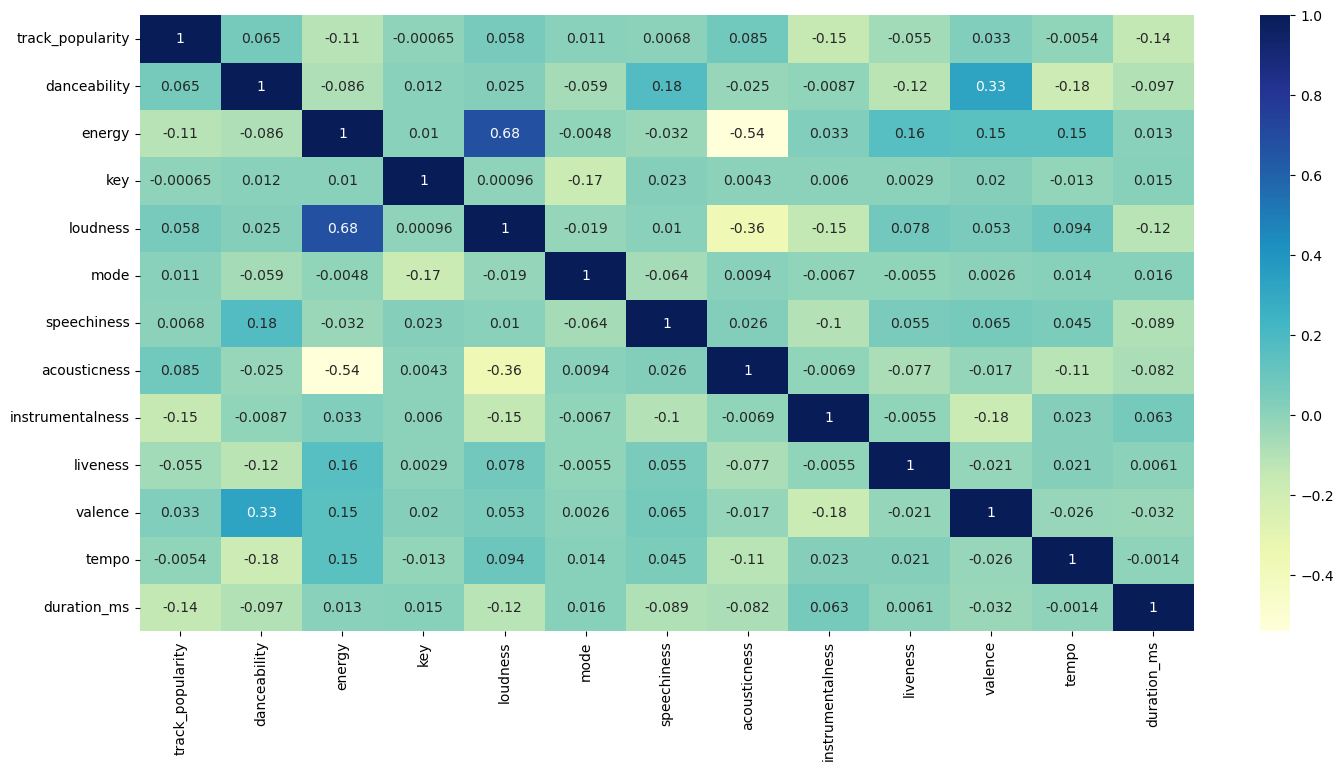

In [17]:
fig,ax= subplots(figsize = (17,8))
sns.heatmap(spotify.corr(numeric_only=True),annot= True, cmap="YlGnBu", ax=ax)
fig.show();

<strong>Correlation Matrix:</strong> There are only a couple predictors that have high linear correlation. This is not the end of the world, as a combination of predictors (3 or more) could have a higher correlation. We can perform PCA to help us observe trends in our multidimensional data.

### 2.4 - <strong>Data Check Conclusion:</strong> All of the values are within an acceptable range as well. After cleaning the data to ensure we can work with all observations we can begin exploring the data a bit more, and split the data into test and training data.
Loudness is in the negatives for the minimum value, which makes sense as loudness is measured in decibals.

## 3 - PCA
Use PCA to reduce the dimensionality of the data

### 3.1 - Normalize numerical columns

In [18]:
# Make a copy of the spotify dataset to only include colums that are numeric. Include the playlist_genre column as well.
spotify_numeric = spotify[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms']].copy()
# Normalize the data
spotify_numeric = StandardScaler().fit_transform(spotify_numeric)
# Convert the normalized data into a dataframe.
spotify_numeric = pd.DataFrame(spotify_numeric, columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms'])
spotify_numeric.head()

danceability    energy       key  loudness      mode  speechiness  \
0      0.642049  1.201614  0.173200  1.367123  0.876177    -0.481362   
1      0.490412  0.643317  1.557627  0.585766  0.876177    -0.688642   
2      0.138889  1.284529 -1.211227  1.100090 -1.141322    -0.324422   
3      0.435271  1.279002  0.450085  0.984309  0.876177    -0.050024   
4     -0.033426  0.742815 -1.211227  0.685151  0.876177    -0.702460   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  
0     -0.333898         -0.377953 -0.809230  0.031908  0.042927    -0.518874  
1     -0.468670         -0.359177  1.081061  0.782522 -0.777198    -1.056268  
2     -0.436799         -0.377849 -0.519562  0.439384  0.116227    -0.822017  
3     -0.667642         -0.377911  0.089582 -1.001795  0.039953    -0.947750  
4     -0.432701         -0.377953 -0.692585  0.919777  0.115037    -0.614172

### 3.2 - PCA on Standardized Dataset

In [19]:
# PCA
pca = PCA(n_components=0.85)
scores = pca.fit_transform(spotify_numeric)

#### Add a numerical 'target' column that corresponds to the observations 'playlist_genre' column.
Gives each unique 'playlist_genre' a numerical value and creates a new column named 'target' in the spotify dataframe

In [20]:
# Get unique playlist genres
unique_genres = spotify['playlist_genre'].unique()

# Create a dictionary to map each unique genre to a numerical value
genre_mapping = {genre: i for i, genre in enumerate(unique_genres)}

# Create the 'target' variable using the mapping
spotify['target'] = spotify['playlist_genre'].map(genre_mapping)

# Print the first few rows of the DataFrame to verify the 'target' variable
spotify.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... loudness  mode  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -2.634     1   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.969     1   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.432     0   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -3.778     1   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   -4.672     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0       0.0583        0.1020          0.000000    0.0653    0.518  122.036   
1       0.0373        0.0724          0.004210    0.3570    0.693   99.972   
2       0.0742        0.0794          0.000023    0.1100    0.613  124.008   
3       0.1020        0.0287          0.000009    0.2040    0.277  121.956   
4       0.0359        0.0803          0.000000    0.0833    0.725  123.976   

   duration_ms  target  
0       194754       0  
1       162600       0  
2       176616       0  
3       169093       0  
4       189052       0  

[5 rows x 24 columns]

In [21]:
spotify.dtypes

track_id                     object
track_name                   object
track_artist                 object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
target                        int64
dtype: object

### 3.3 - PCA Visualization

Text(0, 0.5, 'PC2')

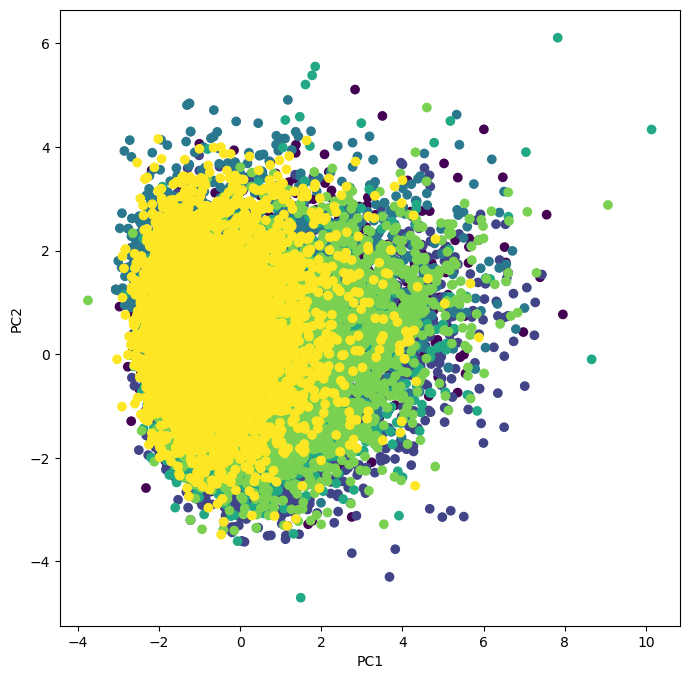

In [22]:
i, j = 0, 1 # which components
fig, ax = subplots(1, 1, figsize=(8, 8)) 
ax.scatter(scores[:,0], scores[:,1], c=spotify.target)
ax.set_xlabel('PC%d' % (i+1)) 
ax.set_ylabel('PC%d' % (j+1))

In [23]:
fig = px.density_heatmap(scores, x=scores[:,0], y=scores[:,1], 
                         nbinsx=100, nbinsy=100, color_continuous_scale="Viridis")
fig.update_layout(
    width=800,  # width in pixels
    height=800,  # height in pixels
)
fig.show()

The following plot is <strong><u>interactive</u></strong>. Please rotate the graph and select different combinations of genres to see a 3D representation of the first 3 PCA components.

In [24]:
fig = px.scatter_3d(scores, x=scores[:,0], y=scores[:,1], z=scores[:,2], color=spotify.playlist_genre, symbol=spotify.playlist_genre)
fig.update_layout(
    width=1200,  # width in pixels
    height=700,  # height in pixels
)
fig.show()

In [25]:
%%capture
fig, axes = subplots(1, 2, figsize=(15, 6)) 
ticks = np.arange(pca.n_components_)+1
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Principal Component'); 
ax.set_ylabel('Proportion of Variance Explained') 
ax.set_ylim([0,1])
ax.set_xticks(ticks)

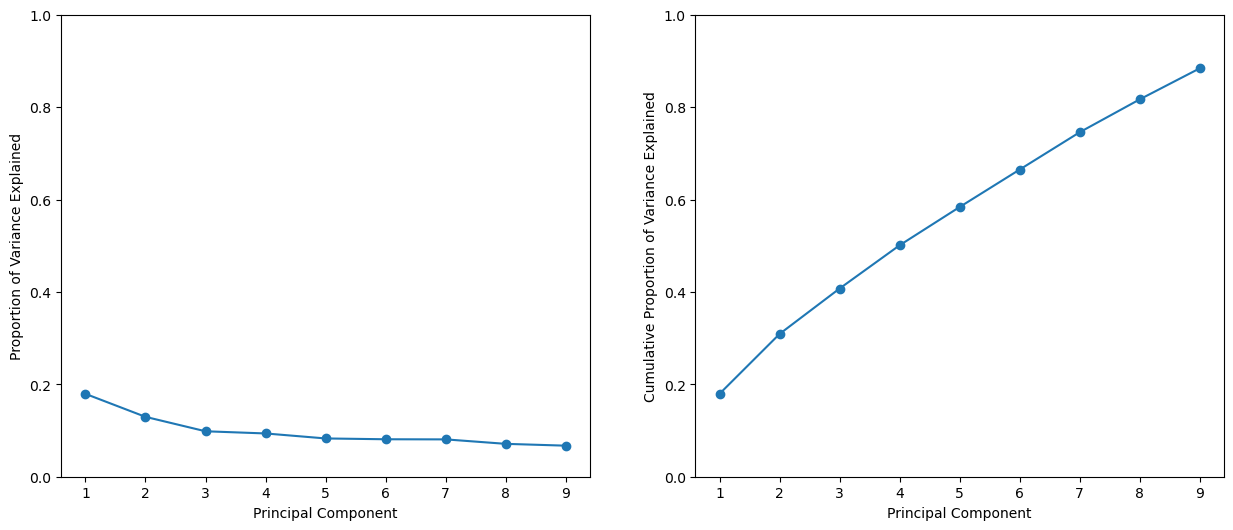

In [26]:
ax = axes[1] 
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o')
ax.set_xlabel('Principal Component') 
ax.set_ylabel('Cumulative Proportion of Variance Explained') 
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

## 4 - Spotify Training/Test Split
We will use the train_test_split package to split our data set into a training set, and a test set to see how well our model can predict genre based on a set of predictors.

In [27]:
spotify_numeric['target'] = spotify.target
# Split the data into training and testing sets
spotify_train, spotify_test = train_test_split(spotify_numeric, test_size=0.2, random_state=43)
# Drop the playlist_genre column from the training set and put it into a train_true_labels variable
train_true_labels = spotify_train.target
spotify_train = spotify_train.drop(columns=['target'])
#spotify_train = spotify_train.drop(columns=['playlist_genre'])
# Do the same for the testing set
test_true_labels = spotify_test.target
spotify_test = spotify_test.drop(columns=['target'])
#spotify_test = spotify_test.drop(columns=['playlist_genre'])
spotify_train.head()

danceability    energy       key  loudness      mode  speechiness  \
10100      1.207242 -0.362723 -1.211227  0.278578  0.876177    -0.658043   
10785      0.207815 -0.036589 -0.934342  0.534568  0.876177    -0.605730   
22010      1.407128 -2.297416 -1.211227 -0.298991  0.876177     1.203522   
2091      -0.977712 -0.207948 -0.657456 -0.026938  0.876177    -0.623497   
14353     -1.942676 -1.357708  1.003856 -0.838077  0.876177    -0.643238   

       acousticness  instrumentalness  liveness   valence     tempo  \
10100      1.337100         -0.376606 -0.344595 -0.602897 -0.403042   
10785      0.695109         -0.377953 -0.240911  0.289261  1.452795   
22010     -0.796983         -0.317300 -0.704249  0.833992 -1.147154   
2091      -0.673561         -0.377953 -0.467720 -0.212578  2.201851   
14353      0.390050         -0.377748 -0.195549 -0.397015 -0.947736   

       duration_ms  
10100    -0.846184  
10785     0.238182  
22010    -0.698607  
2091      0.042572  
14353    -0.483993

In [28]:
# make train_true_labels a numpy array
train_true_labels_array = np.array(train_true_labels)
test_true_labels_array = np.array(test_true_labels)
# make train_true_labels_array have all integer values
train_true_labels_array = train_true_labels_array.astype(int)
test_true_labels_array = test_true_labels_array.astype(int)
# make train_true_labels equal to train_true_labels_array as a pandas.core.series.Series
train_true_labels = pd.Series(train_true_labels_array)
test_true_labels = pd.Series(test_true_labels_array)


## 5 - Data Test (Without PCA)
Classify playlist_genre using numerical predictors with Logistic Regression (OVR and Multinomial), LDA, QDA, Gaussian Naive Bayes, and Random Forests without PCA.

### 5.1 - Logistic Regression (OVR)

In [29]:
# OVR Logistic Regression on the training set
LRModelOVR = LogisticRegression(penalty=None, multi_class='ovr').fit(spotify_train, train_true_labels)
LRpredictOVR_train = LRModelOVR.predict(spotify_train)
LRpredictOVR_test = LRModelOVR.predict(spotify_test)

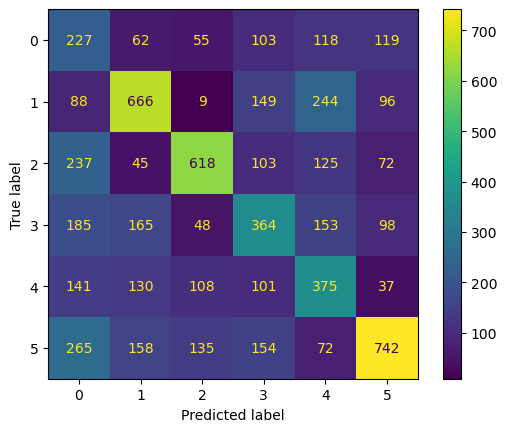

In [30]:
cm = confusion_matrix(LRpredictOVR_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [31]:
print(np.mean(LRpredictOVR_test == test_true_labels), np.mean(LRpredictOVR_test != test_true_labels))

0.4556113902847571 0.5443886097152428


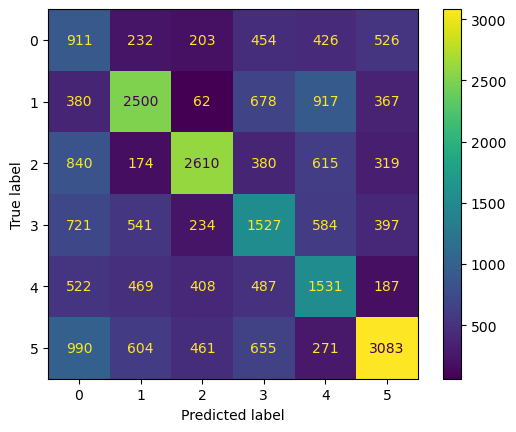

In [32]:
cm = confusion_matrix(LRpredictOVR_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [33]:
print(np.mean(LRpredictOVR_train == train_true_labels), np.mean(LRpredictOVR_train != train_true_labels))

0.463032056651184 0.5369679433488159


### 5.2 - Logistic Regression (Multinomial)

In [34]:
LRModelMulti = LogisticRegression(penalty=None, multi_class='multinomial').fit(spotify_train, train_true_labels)
LRpredictMulti_train = LRModelMulti.predict(spotify_train)
LRpredictMulti_test = LRModelMulti.predict(spotify_test)

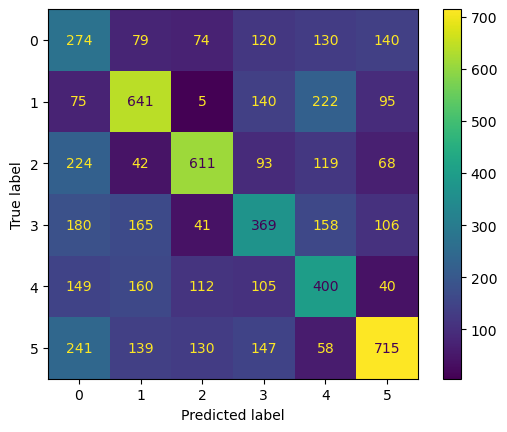

In [35]:
cm = confusion_matrix(LRpredictMulti_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [36]:
print(np.mean(LRpredictMulti_test == test_true_labels), np.mean(LRpredictMulti_test != test_true_labels))

0.4583523679001066 0.5416476320998934


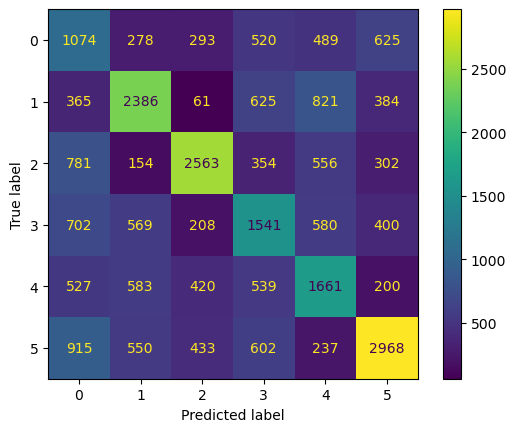

In [37]:
cm = confusion_matrix(LRpredictMulti_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [38]:
print(np.mean(LRpredictMulti_train == train_true_labels), np.mean(LRpredictMulti_train != train_true_labels))

0.4642122896520216 0.5357877103479783


### 5.3 - Linear Discriminant Analysis (LDA)

In [39]:
lda = LDA(store_covariance=True)
LDAModel = lda.fit(spotify_train, train_true_labels)
LDApredict_test = LDAModel.predict(spotify_test)
LDApredict_train = LDAModel.predict(spotify_train)

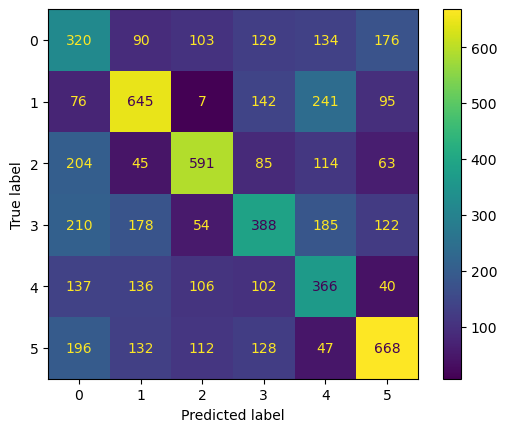

In [40]:
cm = confusion_matrix(LDApredict_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [41]:
print(np.mean(LDApredict_test == test_true_labels), np.mean(LDApredict_test != test_true_labels))

0.45347951880615195 0.546520481193848


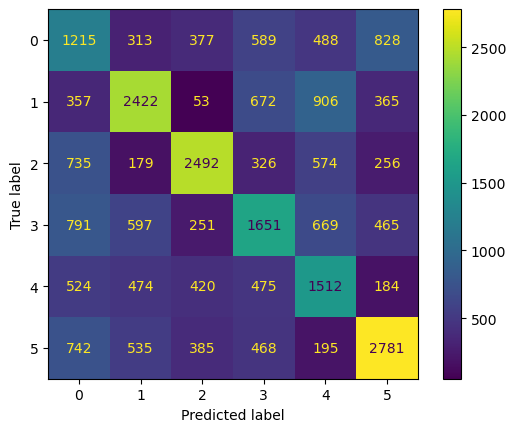

In [42]:
cm = confusion_matrix(LDApredict_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [43]:
print(np.mean(LDApredict_train == train_true_labels), np.mean(LDApredict_train != train_true_labels))

0.45964364577781164 0.5403563542221884


### 5.4 - Quadratic Discriminant Analysis (QDA)

In [44]:
qda = QDA(store_covariance=True)
qda.fit(spotify_train, train_true_labels)
qda_pred_test = qda.predict(spotify_test)
qda_pred_train = qda.predict(spotify_train)

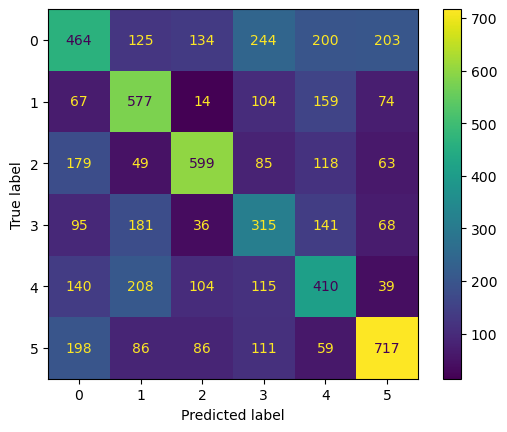

In [45]:
cm = confusion_matrix(qda_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [46]:
print(np.mean(qda_pred_test == test_true_labels), np.mean(qda_pred_test != test_true_labels))

0.46931627836150447 0.5306837216384955


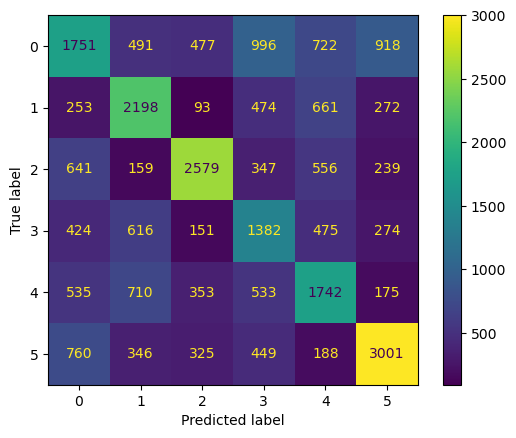

In [47]:
cm = confusion_matrix(qda_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [48]:
print(np.mean(qda_pred_train == train_true_labels), np.mean(qda_pred_train != train_true_labels))

0.48172542450315997 0.51827457549684


### 5.5 - Gaussian Naive Bayes (GNB)

In [49]:
GNB = GaussianNB()
GNB.fit(spotify_train, train_true_labels)
GNB_pred_test = GNB.predict(spotify_test)
GNB_pred_train = GNB.predict(spotify_train)

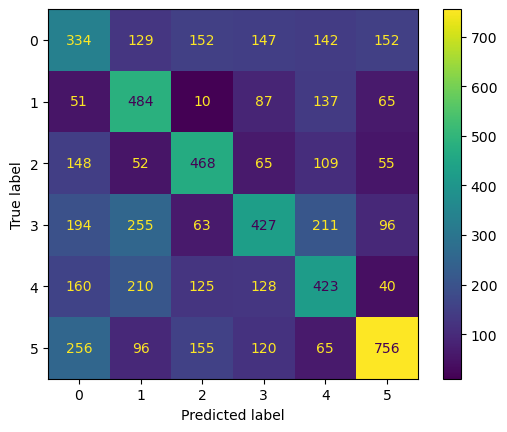

In [50]:
cm = confusion_matrix(GNB_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [51]:
print(np.mean(GNB_pred_test == test_true_labels), np.mean(GNB_pred_test != test_true_labels))

0.4403837368661489 0.559616263133851


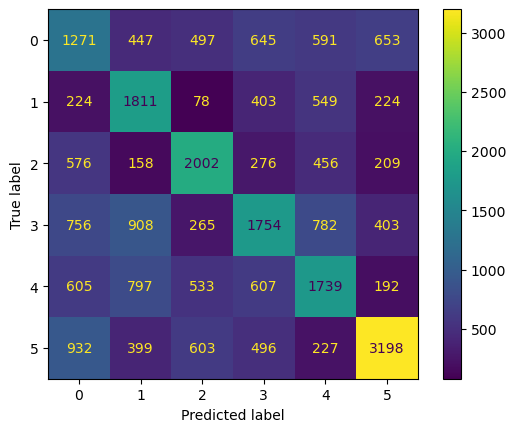

In [52]:
cm = confusion_matrix(GNB_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [53]:
print(np.mean(GNB_pred_train == train_true_labels), np.mean(GNB_pred_train != train_true_labels))

0.4482981801568568 0.5517018198431433


### 5.6 - K Nearest Neighbors (KNN) with K = 1

In [54]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(spotify_train, train_true_labels)
knn1_pred_test = knn1.predict(spotify_test)
knn1_pred_train = knn1.predict(spotify_train)

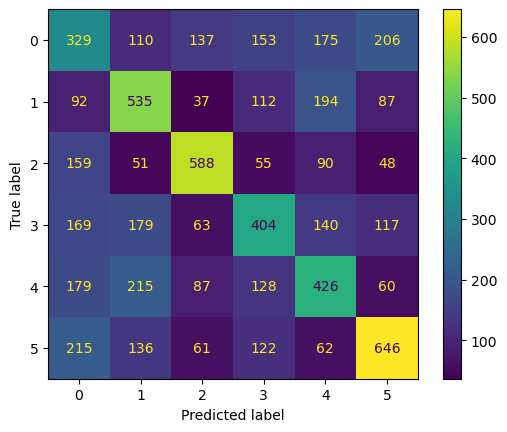

In [55]:
cm = confusion_matrix(knn1_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [56]:
print(np.mean(knn1_pred_test == test_true_labels), np.mean(knn1_pred_test != test_true_labels))

0.4458656920968479 0.5541343079031521


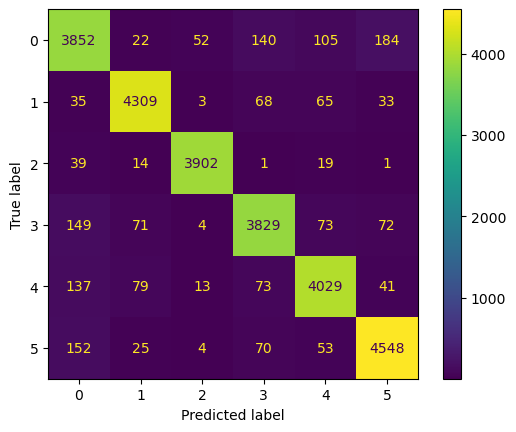

In [57]:
cm = confusion_matrix(knn1_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [58]:
print(np.mean(knn1_pred_train == train_true_labels), np.mean(knn1_pred_train != train_true_labels))

0.9315845579837052 0.06841544201629483


### 5.7 - K Nearest Neighbors (KNN) with K = 3

In [59]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(spotify_train, train_true_labels)
knn3_pred_test = knn3.predict(spotify_test)
knn3_pred_train = knn3.predict(spotify_train)

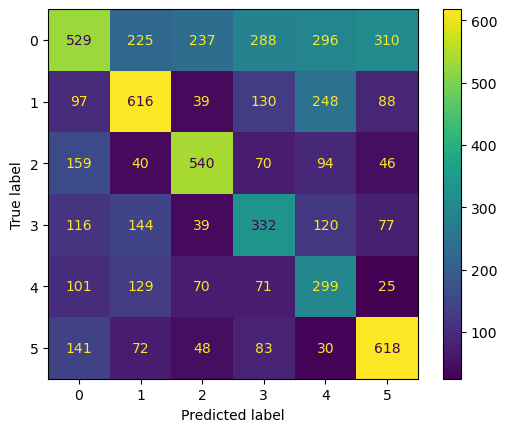

In [60]:
cm = confusion_matrix(knn3_pred_test, test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [61]:
print(np.mean(knn3_pred_test == test_true_labels), np.mean(knn3_pred_test != test_true_labels))

0.4467793513019644 0.5532206486980357


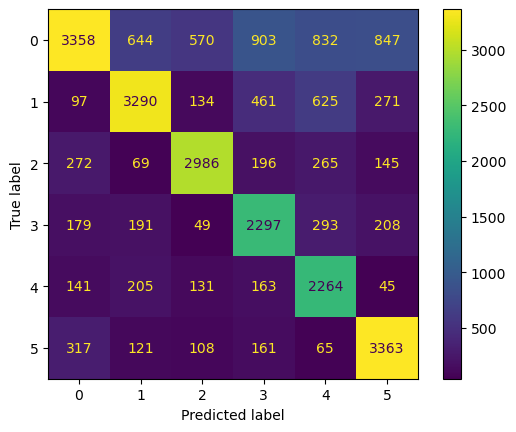

In [62]:
cm = confusion_matrix(knn3_pred_train, train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [63]:
print(np.mean(knn3_pred_train == train_true_labels), np.mean(knn3_pred_train != train_true_labels))

0.6684687428614939 0.33153125713850606


### 5.8 - KNN Plot of K=1 to K=20

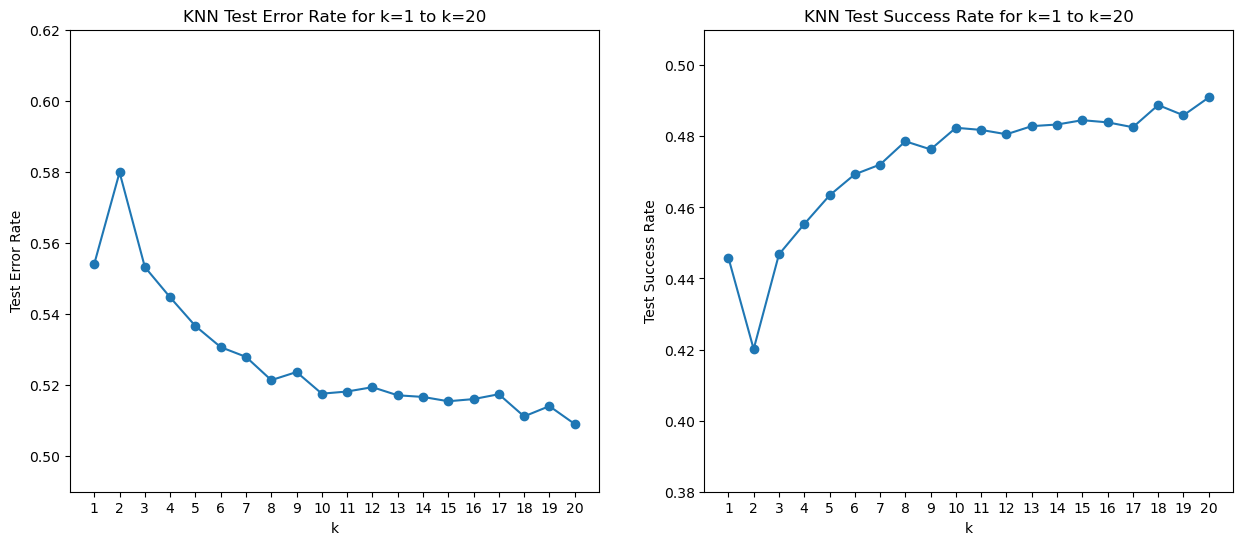

In [64]:
# KNN algorithm for k=1 to k=20 and plots the test error rate for each k
fig, axes = subplots(1, 2, figsize=(15, 6))
ax = axes[0]
ticks = np.arange(1, 21)
knn_test_error = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(spotify_train, train_true_labels)
    knn_pred_test = knn.predict(spotify_test)
    knn_test_error.append(np.mean(knn_pred_test != test_true_labels))
ax.plot(ticks, knn_test_error, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Error Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Error Rate for k=1 to k=20')

ax = axes[1]
knn_test_success = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(spotify_train, train_true_labels)
    knn_pred_test = knn.predict(spotify_test)
    knn_test_success.append(np.mean(knn_pred_test == test_true_labels))
ax.plot(ticks, knn_test_success, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Success Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Success Rate for k=1 to k=20')
# Set the top of the y-axis limits for both plots
axes[0].set_ylim([0.49, 0.62])
axes[1].set_ylim([0.38, 0.51]);

In [137]:
knn18 = KNeighborsClassifier(n_neighbors=18) 
knn18.fit(spotify_train, train_true_labels)
knn18_pred_test = knn18.predict(spotify_test)

In [138]:
accuracy_score(knn18_pred_test, test_true_labels)

0.488807674737323

### 5.9 - Random Forest

In [66]:
rf = RandomForestClassifier()
rf.fit(spotify_train, train_true_labels)

RandomForestClassifier()

In [67]:
y_pred_RF = rf.predict(spotify_test)
accuracy_score(test_true_labels, y_pred_RF)

0.5507842241510583

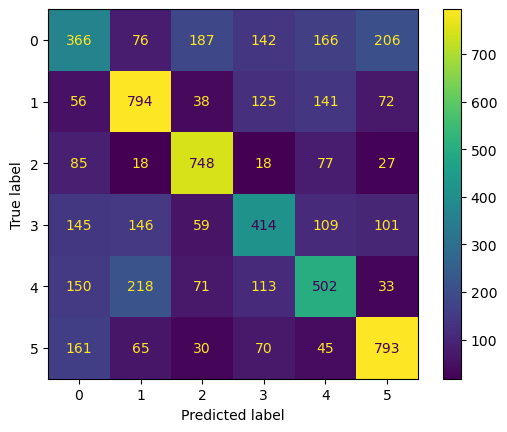

In [68]:
cm = confusion_matrix(test_true_labels, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

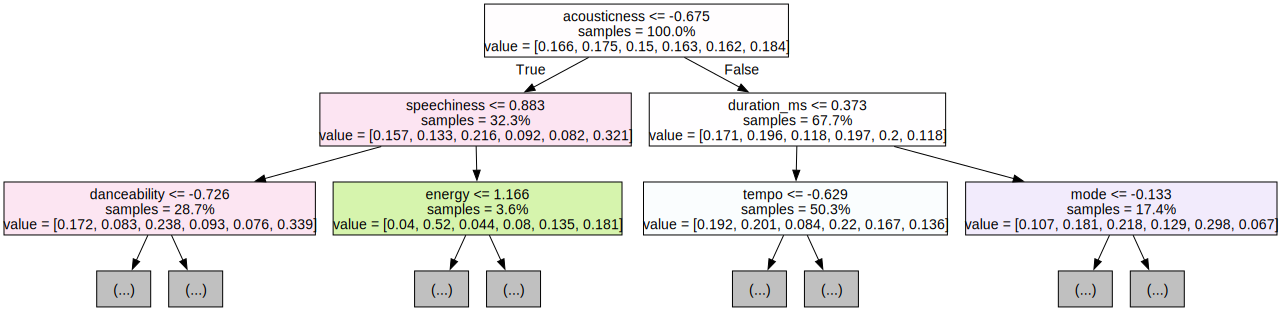

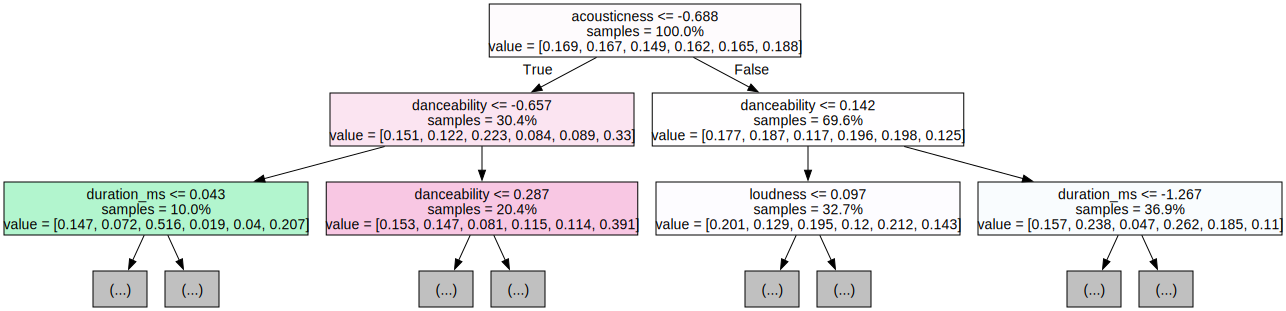

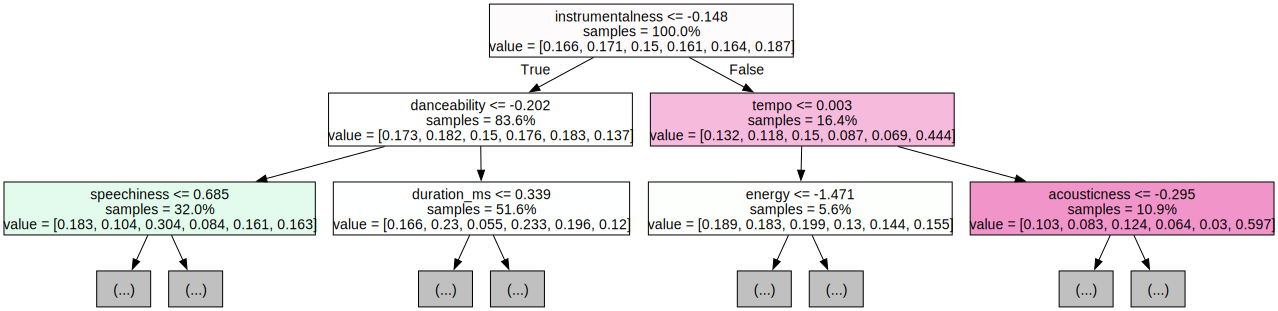

In [69]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=spotify_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### 5.10 - Hyperparameter tuning (Random Forest)

In [70]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(spotify_train, train_true_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1767e4c90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x176c2f750>})

In [71]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 13, 'n_estimators': 421}


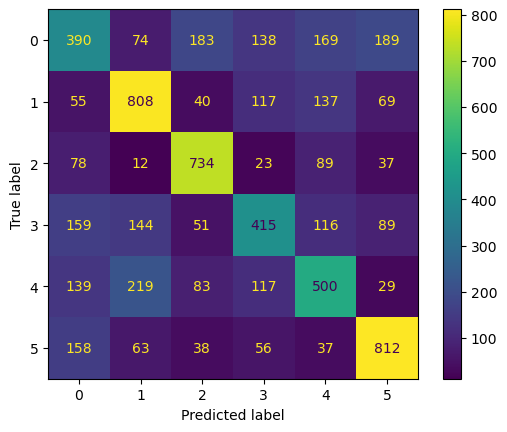

In [72]:
# Generate predictions with the best model
y_pred = best_rf.predict(spotify_test)

# Create the confusion matrix
cm = confusion_matrix(test_true_labels, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [73]:
print(np.mean(y_pred == test_true_labels), np.mean(y_pred != test_true_labels))

0.5571798385868738 0.44282016141312625


### 5.11 Random Forest (Bagging Classifier)

In [74]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [75]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(spotify_train, train_true_labels)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(spotify_test)

oob score = 0.5488844894540471


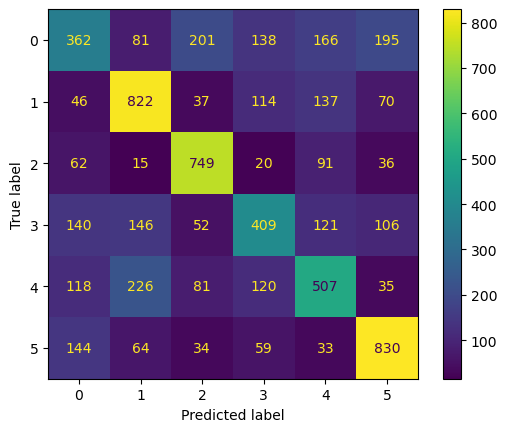

In [76]:
cm = confusion_matrix(test_true_labels, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [77]:
accuracy_score(test_true_labels, pred)

0.5602253692705954

In [78]:
precision_score(test_true_labels, pred, average='macro')

0.5466567251392495

In [79]:
recall_score(test_true_labels, pred, average='macro')

0.5593942156540844

### 5.12 - AdaBoost Classifier

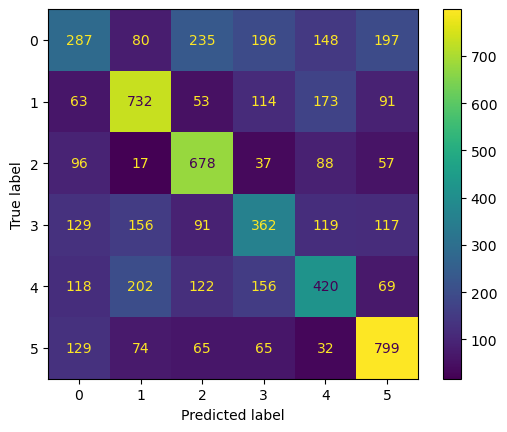

In [80]:
# Create a AdaBoostClassifier object
ada = AdaBoostClassifier(n_estimators=100, random_state=0).fit(spotify_train, train_true_labels)
pred_ada = ada.predict(spotify_test)

cm = confusion_matrix(test_true_labels, pred_ada)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [81]:
accuracy_score(test_true_labels, pred_ada)

0.4991624790619765

### 5.13 - Test Error and Accuracy Plot for each model

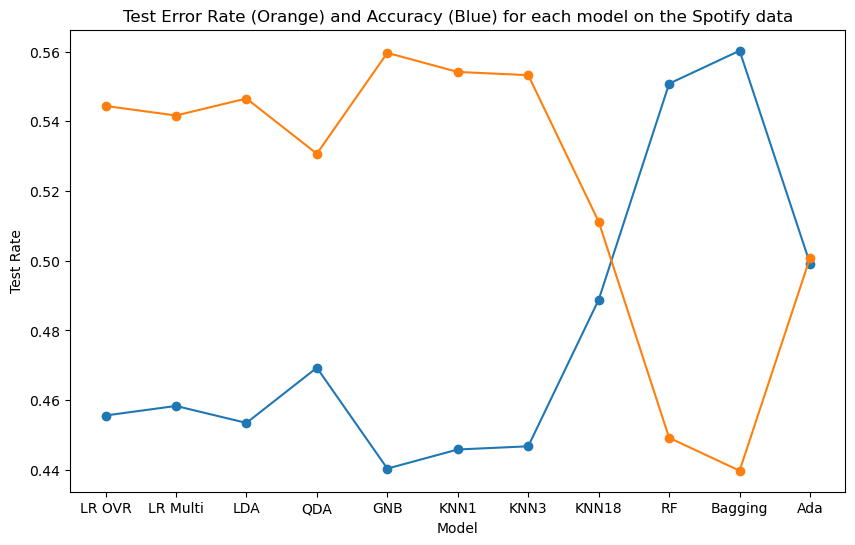

In [82]:
# Make a plot of the test accuracy rate for each models predictions for the spotify data
fig, ax = subplots(figsize=(10, 6))
ticks = np.arange(1, 12)
ax.plot(ticks, [np.mean(LRpredictOVR_test == test_true_labels), 
                np.mean(LRpredictMulti_test == test_true_labels), 
                np.mean(LDApredict_test == test_true_labels), 
                np.mean(qda_pred_test == test_true_labels), 
                np.mean(GNB_pred_test == test_true_labels), 
                np.mean(knn1_pred_test == test_true_labels), 
                np.mean(knn3_pred_test == test_true_labels),
                np.mean(knn18_pred_test == test_true_labels), 
                accuracy_score(test_true_labels, y_pred_RF), 
                accuracy_score(test_true_labels, pred),
                accuracy_score(test_true_labels, pred_ada)],
                marker='o')

# On the same figure, plot the error rate for each model on the spotify data
ax.plot(ticks, [np.mean(LRpredictOVR_test != test_true_labels), 
                np.mean(LRpredictMulti_test != test_true_labels), 
                np.mean(LDApredict_test != test_true_labels), 
                np.mean(qda_pred_test != test_true_labels), 
                np.mean(GNB_pred_test != test_true_labels), 
                np.mean(knn1_pred_test != test_true_labels), 
                np.mean(knn3_pred_test != test_true_labels),
                np.mean(knn18_pred_test != test_true_labels), 
                1 - accuracy_score(test_true_labels, y_pred_RF), 
                1 - accuracy_score(test_true_labels, pred),
                1 - accuracy_score(test_true_labels, pred_ada)],
                marker='o')
ax.set_xlabel('Model')
ax.set_ylabel('Test Rate')
ax.set_xticks(ticks)
ax.set_xticklabels(['LR OVR', 'LR Multi', 'LDA', 'QDA', 'GNB', 'KNN1', 'KNN3', 'KNN18', 'RF', 'Bagging', 'Ada'])
ax.set_title('Test Error Rate (Orange) and Accuracy (Blue) for each model on the Spotify data');

## 6 - PCA Train/Test Split

In [83]:
# Convert scores to a DataFrame
scores_df = pd.DataFrame(scores)
# Add the target variable to the DataFrame
scores_df['target'] = spotify.target
# Split the data into training and testing sets
scores_train, scores_test = train_test_split(scores_df, test_size=0.2, random_state=43)
# Drop the target variable from the training set and put it into a train_true_labels variable
scores_train_true_labels = scores_train.target
scores_train = scores_train.drop(columns=['target'])
# Do the same for the testing set
scores_test_true_labels = scores_test.target
scores_test = scores_test.drop(columns=['target'])
scores_train.head()

0         1         2         3         4         5         6  \
10100  0.937017 -0.529170 -1.654884  0.105199 -0.790019  0.028655 -0.975354   
10785 -0.180580  0.284907 -1.435854  0.310086 -0.223230 -0.623344  0.890213   
22010  1.454042 -2.097678 -1.604721 -0.169070 -0.289269  0.864160  0.104140   
2091  -0.524263  1.438720 -1.117212  0.691040 -0.541634 -1.020013  1.406990   
14353  1.636317  1.158100 -0.022482  0.417986  0.432808 -1.159790 -1.143741   

              7         8  
10100 -0.106525 -0.152383  
10785  0.509794 -0.517624  
22010 -0.894924  0.458283  
2091   0.370846 -0.276728  
14353  0.498358  1.050918

In [84]:
# make train_true_labels a numpy array
train_true_labels_array = np.array(scores_train_true_labels)
test_true_labels_array = np.array(scores_test_true_labels)
# make train_true_labels_array have all integer values
train_true_labels_array = train_true_labels_array.astype(int)
test_true_labels_array = test_true_labels_array.astype(int)
# make train_true_labels equal to train_true_labels_array as a pandas.core.series.Series
scores_train_true_labels = pd.Series(train_true_labels_array)
scores_test_true_labels = pd.Series(test_true_labels_array)


## 7 - Data Test with PCA

### 7.1 - Logistic Regression (OVR)

In [85]:
# OVR Logistic Regression on the training set
LRModelOVR = LogisticRegression(penalty=None, multi_class='ovr').fit(scores_train, scores_train_true_labels)
LRpredictOVR_train = LRModelOVR.predict(scores_train)
LRpredictOVR_test = LRModelOVR.predict(scores_test)

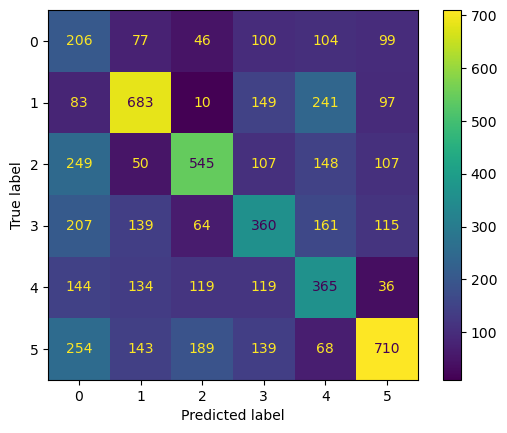

In [86]:
cm = confusion_matrix(LRpredictOVR_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [87]:
accuracy_score(scores_test_true_labels, LRpredictOVR_test)

0.43688137657986903

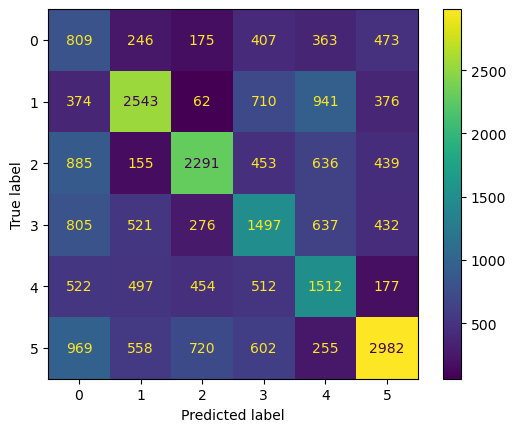

In [88]:
cm = confusion_matrix(LRpredictOVR_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [89]:
accuracy_score(scores_train_true_labels, LRpredictOVR_train)

0.44293002360466

### 7.2 - Logistic Regression (Multinomial)

In [90]:
LRModelMulti = LogisticRegression(penalty=None, multi_class='multinomial').fit(scores_train, scores_train_true_labels)
LRpredictMulti_train = LRModelMulti.predict(scores_train)
LRpredictMulti_test = LRModelMulti.predict(scores_test)

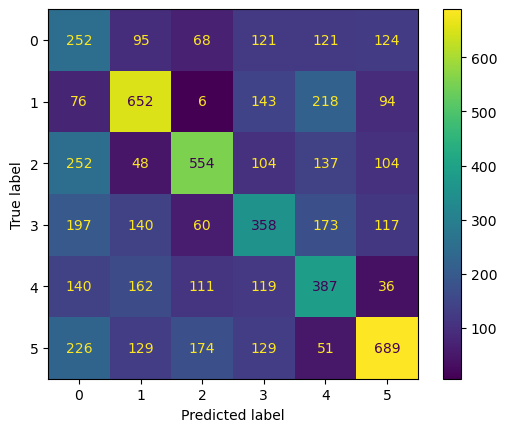

In [91]:
cm = confusion_matrix(LRpredictMulti_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [92]:
accuracy_score(scores_test_true_labels, LRpredictMulti_test)

0.4403837368661489

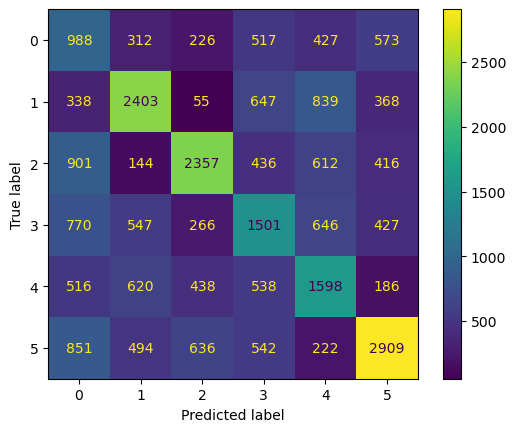

In [93]:
cm = confusion_matrix(LRpredictMulti_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [94]:
accuracy_score(scores_train_true_labels, LRpredictMulti_train)

0.4475748115434402

### 7.3 - Linear Discriminant Analysis (LDA)

In [95]:
lda = LDA(store_covariance=True)
LDAModel = lda.fit(scores_train, scores_train_true_labels)
LDApredict_test = LDAModel.predict(scores_test)
LDApredict_train = LDAModel.predict(scores_train)

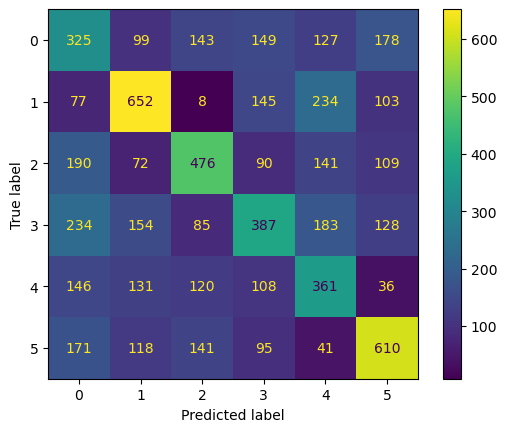

In [96]:
cm = confusion_matrix(LDApredict_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [97]:
accuracy_score(scores_test_true_labels, LDApredict_test)

0.4280493375970763

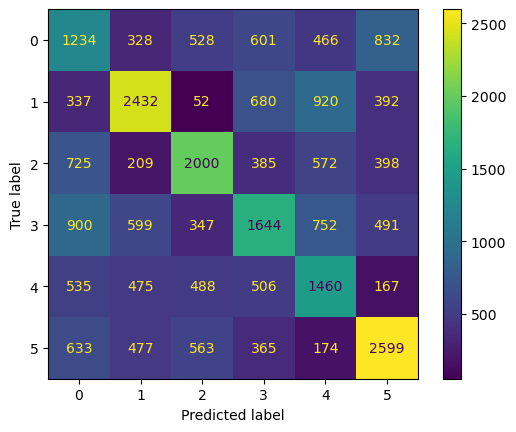

In [98]:
cm = confusion_matrix(LDApredict_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [99]:
accuracy_score(scores_train_true_labels, LDApredict_train)

0.4328409350491129

### 7.4 - Quadratic Discriminant Analysis (QDA)

In [100]:
qda = QDA(store_covariance=True)
qda.fit(scores_train, scores_train_true_labels)
qda_pred_test = qda.predict(scores_test)
qda_pred_train = qda.predict(scores_train)

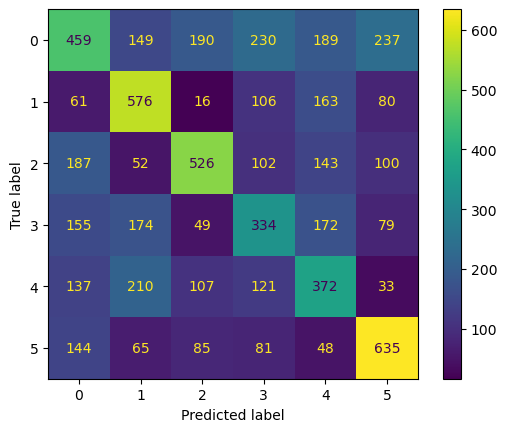

In [101]:
cm = confusion_matrix(qda_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [102]:
accuracy_score(scores_test_true_labels, qda_pred_test)

0.44190650220800975

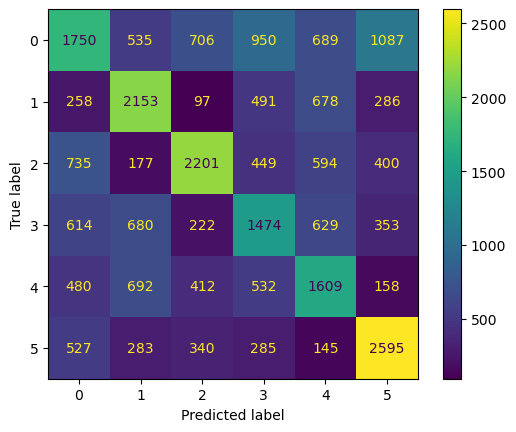

In [103]:
cm = confusion_matrix(qda_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [104]:
accuracy_score(scores_train_true_labels, qda_pred_train)

0.44856468438285235

### 7.5 - Gaussian Naive Bayes (GNB)

In [105]:
GNB = GaussianNB()
GNB.fit(scores_train, scores_train_true_labels)
GNB_pred_test = GNB.predict(scores_test)
GNB_pred_train = GNB.predict(scores_train)

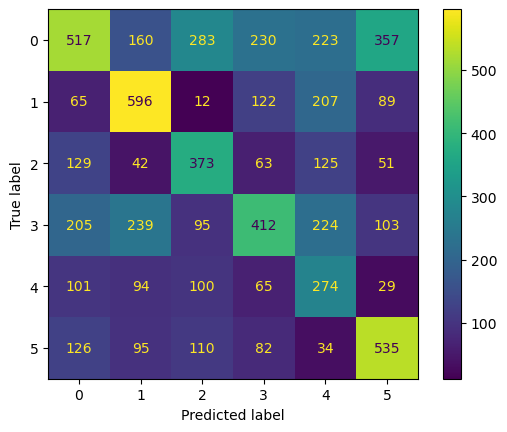

In [106]:
cm = confusion_matrix(GNB_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [107]:
accuracy_score(scores_test_true_labels, GNB_pred_test)

0.4122125780417238

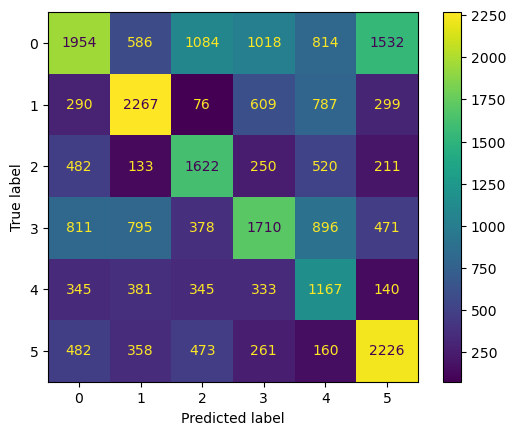

In [108]:
cm = confusion_matrix(GNB_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [109]:
accuracy_score(scores_train_true_labels, GNB_pred_train)

0.4167364653925226

### 7.6 - K Nearest Neighbors (KNN) with K = 1

In [110]:
knn1 = KNeighborsClassifier(n_neighbors=1) 
knn1.fit(scores_train, scores_train_true_labels)
knn1_pred_test = knn1.predict(scores_test)
knn1_pred_train = knn1.predict(scores_train)

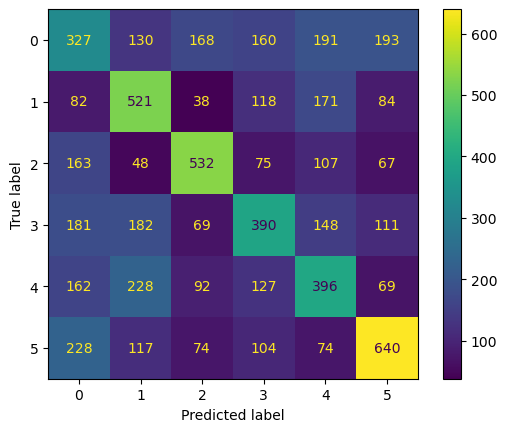

In [111]:
cm = confusion_matrix(knn1_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [112]:
accuracy_score(scores_test_true_labels, knn1_pred_test)

0.4272879549261459

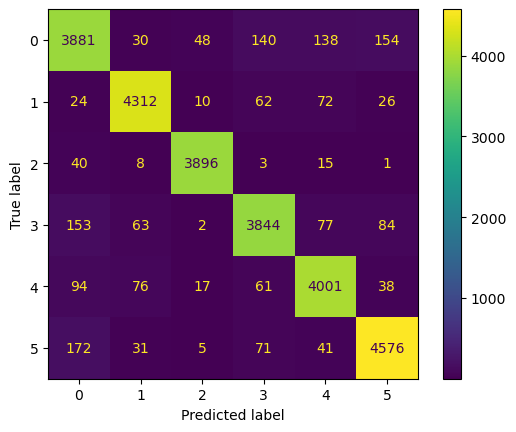

In [113]:
cm = confusion_matrix(knn1_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [114]:
accuracy_score(scores_train_true_labels, knn1_pred_train)

0.9331455113073935

### 7.7 - K Nearest Neighbors (KNN) with K = 3

In [115]:
knn3 = KNeighborsClassifier(n_neighbors=3) 
knn3.fit(scores_train, scores_train_true_labels)
knn3_pred_test = knn3.predict(scores_test)
knn3_pred_train = knn3.predict(scores_train)

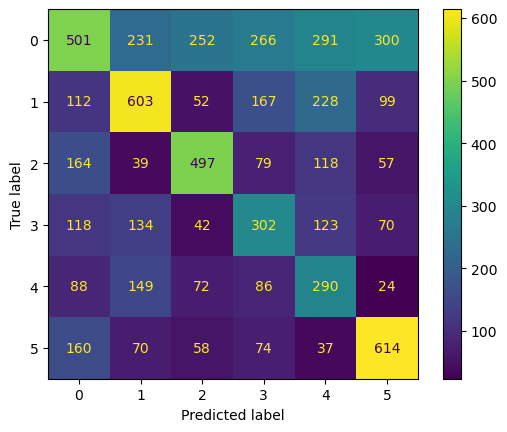

In [116]:
cm = confusion_matrix(knn3_pred_test, scores_test_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [117]:
accuracy_score(scores_test_true_labels, knn3_pred_test)

0.42744023146033194

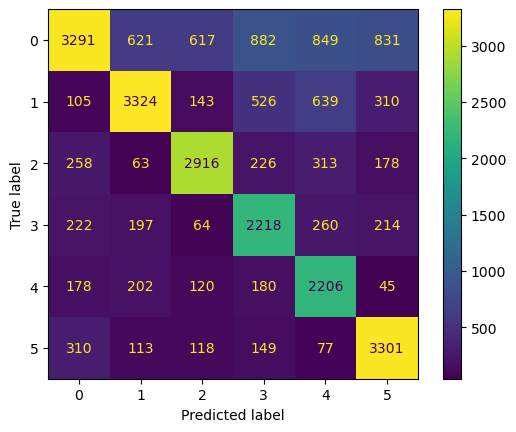

In [118]:
cm = confusion_matrix(knn3_pred_train, scores_train_true_labels)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [119]:
accuracy_score(scores_train_true_labels, knn3_pred_train)

0.6569709891113987

### 7.8 - KNN Plot of K=1 to K=20

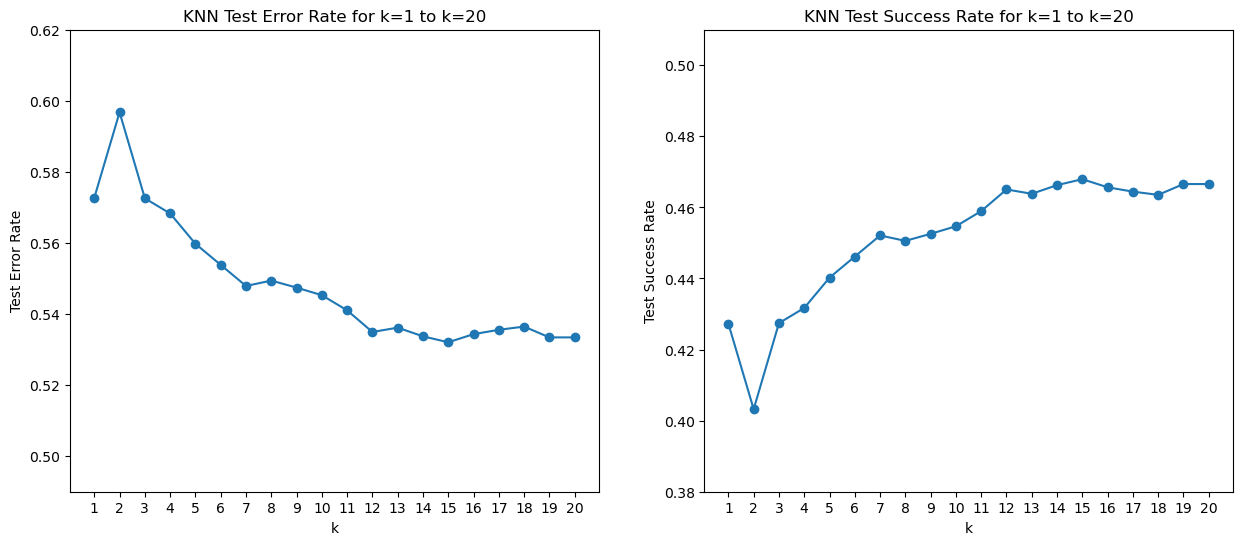

In [120]:
# KNN algorithm for k=1 to k=20 and plots the test error rate for each k
fig, axes = subplots(1, 2, figsize=(15, 6))
ax = axes[0]
ticks = np.arange(1, 21)
knn_test_error = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scores_train, scores_train_true_labels)
    knn_pred_test = knn.predict(scores_test)
    knn_test_error.append(np.mean(knn_pred_test != scores_test_true_labels))
ax.plot(ticks, knn_test_error, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Error Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Error Rate for k=1 to k=20')

ax = axes[1]
knn_test_success = []
for k in ticks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(scores_train, scores_train_true_labels)
    knn_pred_test = knn.predict(scores_test)
    knn_test_success.append(np.mean(knn_pred_test == scores_test_true_labels))
ax.plot(ticks, knn_test_success, marker='o')
ax.set_xlabel('k')
ax.set_ylabel('Test Success Rate')
ax.set_xticks(ticks)
ax.set_title('KNN Test Success Rate for k=1 to k=20')
axes[0].set_ylim([0.49, 0.62])
axes[1].set_ylim([0.38, 0.51]);

In [121]:
knn20 = KNeighborsClassifier(n_neighbors=20) 
knn20.fit(spotify_train, train_true_labels)
knn20_pred_test = knn20.predict(spotify_test)

In [139]:
accuracy_score(knn20_pred_test, test_true_labels)

0.4909395462159281

### 7.9 - Random Forest

In [122]:
rf = RandomForestClassifier()
rf.fit(scores_train, scores_train_true_labels)

RandomForestClassifier()

In [123]:
y_pred_RF = rf.predict(scores_test)
accuracy_score(scores_test_true_labels, y_pred_RF)

0.4945941830363941

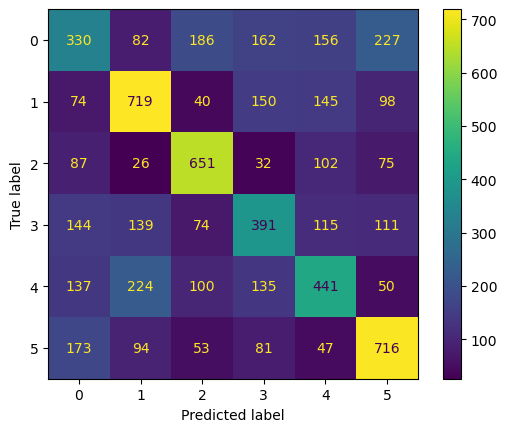

In [124]:
cm = confusion_matrix(scores_test_true_labels, y_pred_RF)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

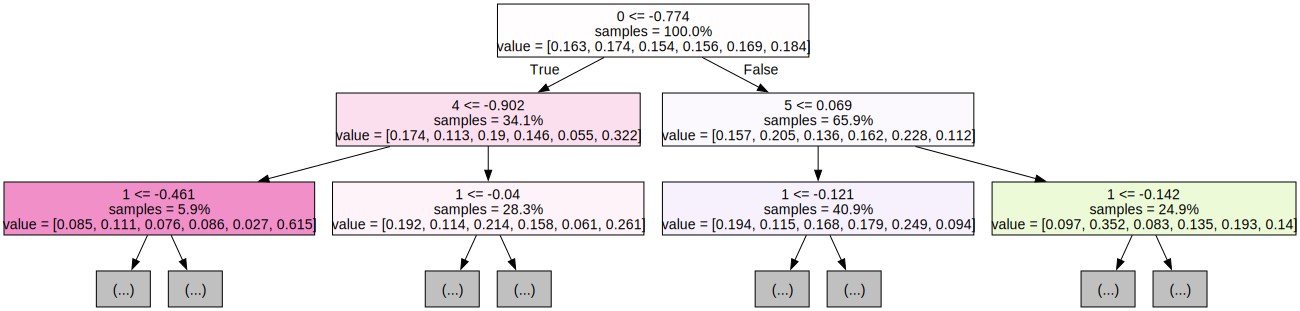

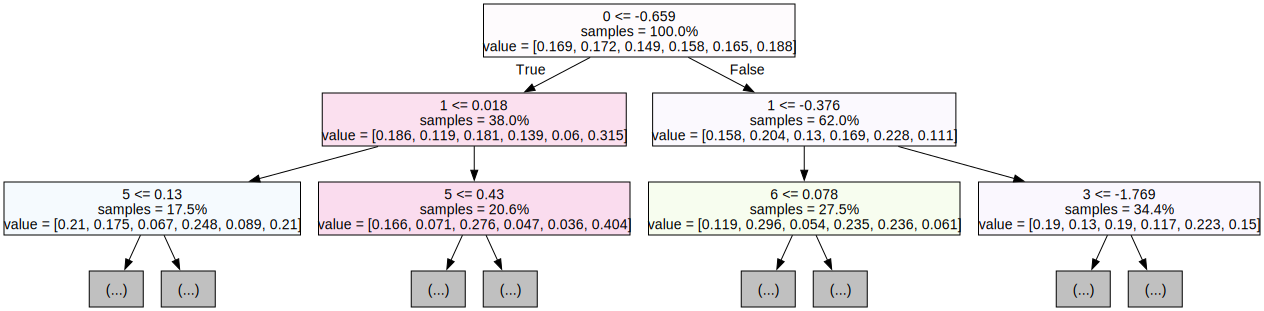

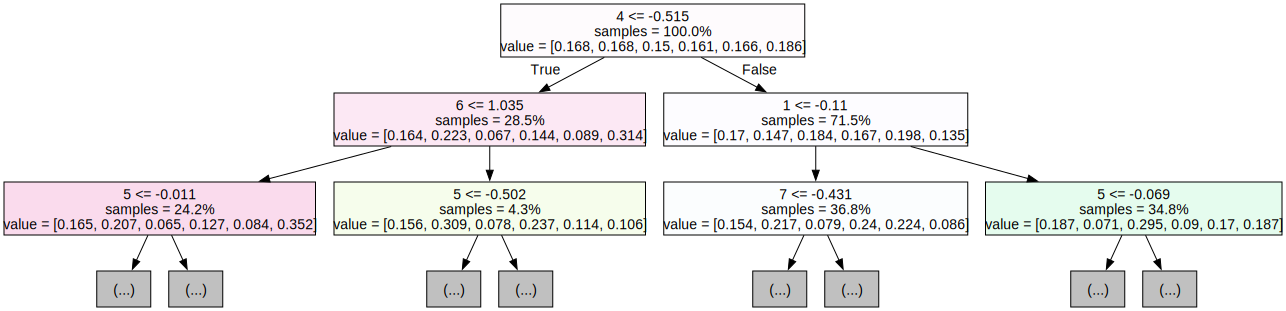

In [125]:
# Export the first three decision trees from the forest

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=scores_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

### 7.10 - Hyperparameter tuning (Random Forest)

In [126]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(scores_train, scores_train_true_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1767e4c90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x176c2f750>})

In [127]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 19, 'n_estimators': 300}


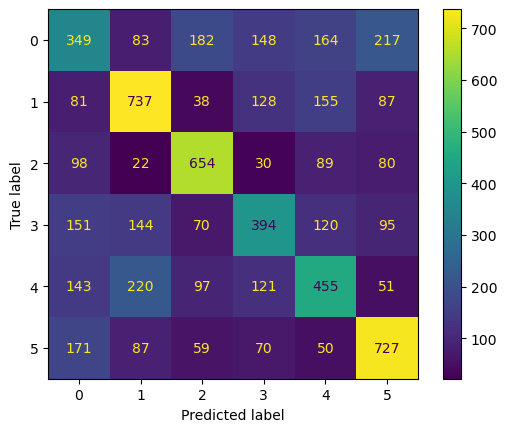

In [128]:
# Generate predictions with the best model
y_pred = best_rf.predict(scores_test)

# Create the confusion matrix
cm = confusion_matrix(scores_test_true_labels, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [129]:
accuracy_score(scores_test_true_labels, y_pred)

0.5049489873610477

### 7.11 Random Forest (Bagging Classifier)

In [130]:
tree = DecisionTreeClassifier(min_samples_leaf=7) #min_samples_split=11

In [131]:
ens_model = BaggingClassifier(estimator=tree, n_estimators=100, 
                                  bootstrap=True,
                                  bootstrap_features=True,     # RF
                                  oob_score=True,                     
                                  random_state=0).fit(scores_train, scores_train_true_labels)

print('oob score =', ens_model.oob_score_)

pred = ens_model.predict(scores_test)

oob score = 0.48678900479707604


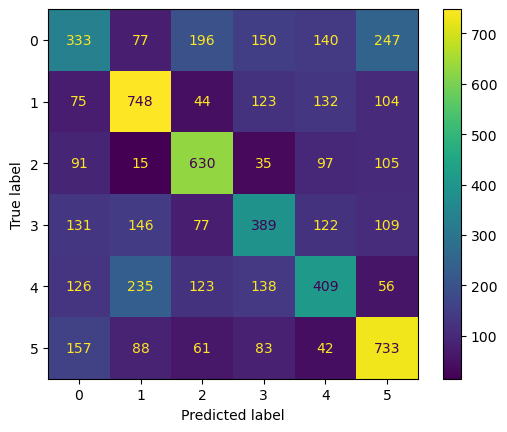

In [132]:
cm = confusion_matrix(scores_test_true_labels, pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [133]:
accuracy_score(scores_test_true_labels, pred)

0.4936805238312776

### 7.12 - AdaBoost Classifier

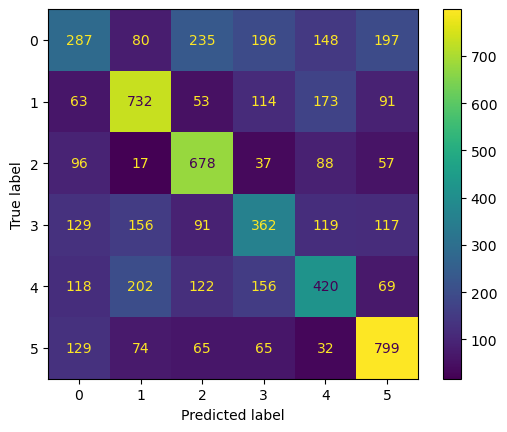

In [134]:
# Create a AdaBoostClassifier object
ada = AdaBoostClassifier(n_estimators=100, random_state=0).fit(spotify_train, train_true_labels)
pred_ada = ada.predict(spotify_test)

cm = confusion_matrix(test_true_labels, pred_ada)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [135]:
accuracy_score(test_true_labels, pred_ada)

0.4991624790619765

### 7.13 - Test Error and Accuracy Plot for each model

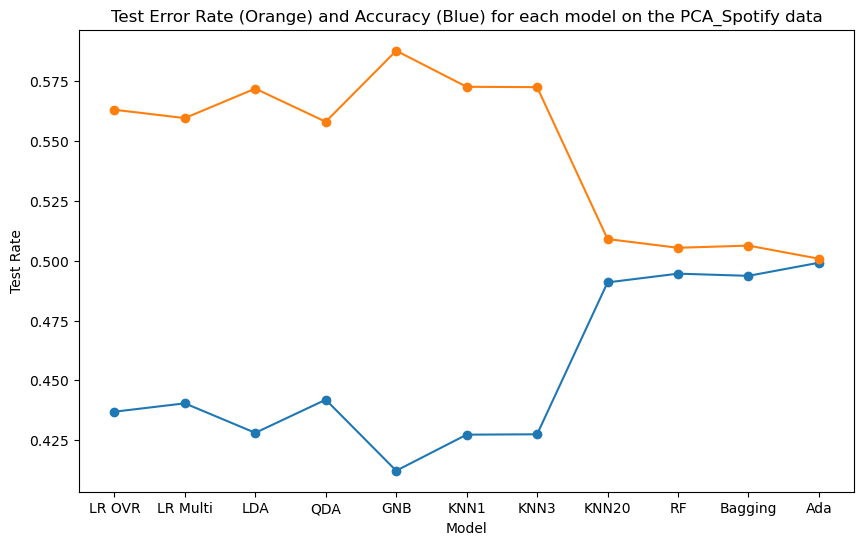

In [136]:
# Make a plot of the test accuracy rate for each models predictions for the scores data and the spotify data
fig, ax = subplots(figsize=(10, 6))
ticks = np.arange(1, 12)
ax.plot(ticks, [np.mean(LRpredictOVR_test == test_true_labels), 
                np.mean(LRpredictMulti_test == test_true_labels), 
                np.mean(LDApredict_test == test_true_labels), 
                np.mean(qda_pred_test == test_true_labels), 
                np.mean(GNB_pred_test == test_true_labels), 
                np.mean(knn1_pred_test == test_true_labels), 
                np.mean(knn3_pred_test == test_true_labels),
                np.mean(knn20_pred_test == test_true_labels), 
                accuracy_score(test_true_labels, y_pred_RF), 
                accuracy_score(test_true_labels, pred), 
                accuracy_score(test_true_labels, pred_ada)],
                marker='o')

# On the same figure, plot the error rate for each model on the scores data and the spotify data
ax.plot(ticks, [np.mean(LRpredictOVR_test != test_true_labels), 
                np.mean(LRpredictMulti_test != test_true_labels), 
                np.mean(LDApredict_test != test_true_labels), 
                np.mean(qda_pred_test != test_true_labels), 
                np.mean(GNB_pred_test != test_true_labels), 
                np.mean(knn1_pred_test != test_true_labels), 
                np.mean(knn3_pred_test != test_true_labels),
                np.mean(knn20_pred_test != test_true_labels), 
                1 - accuracy_score(test_true_labels, y_pred_RF), 
                1 - accuracy_score(test_true_labels, pred), 
                1 - accuracy_score(test_true_labels, pred_ada)],
                marker='o')
ax.set_xlabel('Model')
ax.set_ylabel('Test Rate')
ax.set_xticks(ticks)
ax.set_xticklabels(['LR OVR', 'LR Multi', 'LDA', 'QDA', 'GNB', 'KNN1', 'KNN3', 'KNN20', 'RF', 'Bagging', 'Ada'])
ax.set_title('Test Error Rate (Orange) and Accuracy (Blue) for each model on the PCA_Spotify data');